In [4]:
%pip install numpy pandas matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
  Using cached pandas-2.3.3-cp39-cp39-macosx_11_0_arm64.whl (10.8 MB)
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
     |████████████████████████████████| 11.1 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 348 kB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 73.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 74.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 23.2 MB/s eta 0:00:01
     |████████████████████████████████| 122 kB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 38.2 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 309 kB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 13.5 MB/s eta 0:00:01
You should consider u

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

Matplotlib is building the font cache; this may take a moment.


In [31]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [32]:
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
926,2014,ROLLS-ROYCE,PHANTOM DROPHEAD COUPE,COMPACT,6.7,12,A8,Z,20.7,12.7,17.1,17,393
763,2014,MERCEDES-BENZ,ML 350 4MATIC FFV,SUV - STANDARD,3.5,6,AS7,E,17.8,13.8,16.0,18,256
708,2014,MAZDA,MAZDA3 5-DOOR,MID-SIZE,2.0,4,AS6,X,8.0,5.9,7.1,40,163
1048,2014,VOLKSWAGEN,PASSAT TDI CLEAN DIESEL,MID-SIZE,2.0,4,A6,D,8.1,5.9,7.1,40,192
118,2014,BMW,M5,MID-SIZE,4.4,8,AM7,Z,17.3,11.5,14.7,19,338


In [33]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [34]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
31,4.0,8,11.3,260
841,4.0,6,12.7,292
238,4.3,6,16.8,269
692,3.8,8,14.5,334
725,3.5,6,14.0,224


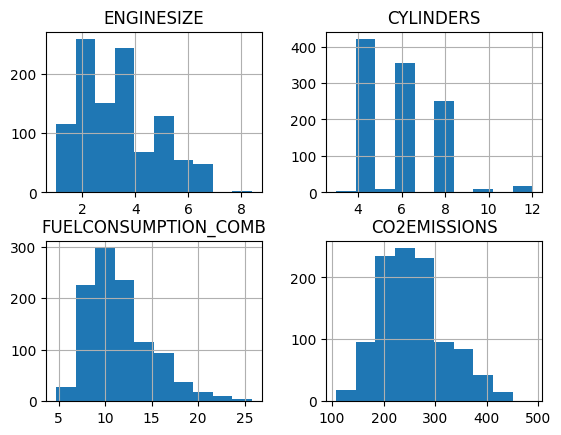

In [35]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

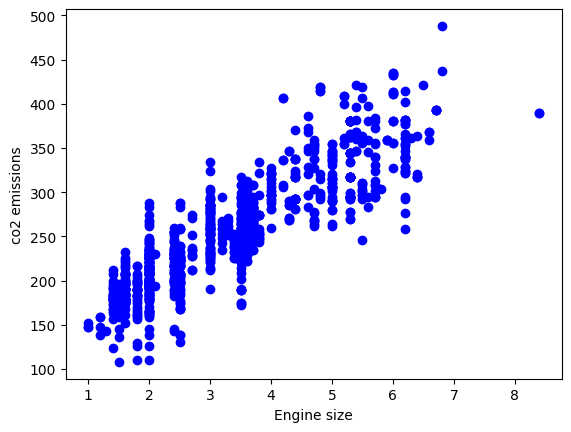

In [36]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("co2 emissions")
plt.show()


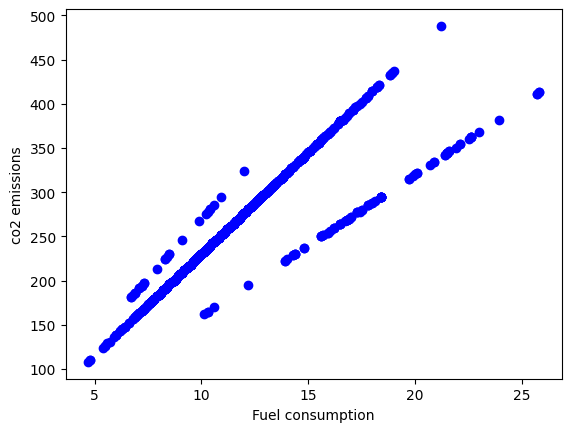

In [37]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel consumption")
plt.ylabel("co2 emissions")
plt.show()

In [38]:
X = cdf[['ENGINESIZE']].to_numpy()
y = cdf[['CO2EMISSIONS']].to_numpy()

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_train.reshape(-1, 1), y_train)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)



Coefficients:  [[38.99297872]]
Intercept:  [126.28970217]


In [41]:
import sklearn.metrics as sm

y_pred = regr.predict(X_test.reshape(-1, 1))

print("Mean absolute error: %.2f" % sm.mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % sm.mean_squared_error(y_test, y_pred))
print("R2 score: %.2f" % sm.r2_score(y_test, y_pred))

Mean absolute error: 24.10
Mean squared error: 985.94
R2 score: 0.76


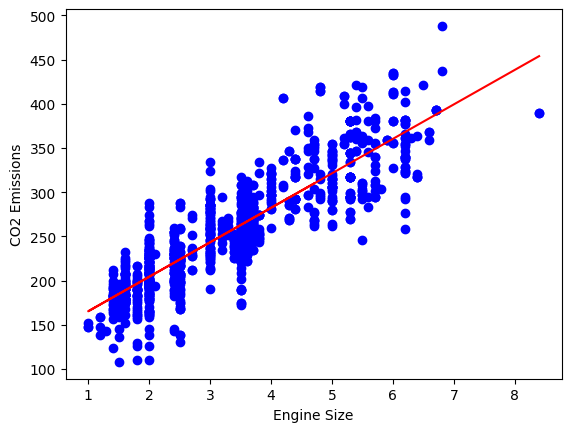

In [43]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.plot(X_test, X_test * regr.coef_ + regr.intercept_, '-r')
plt.show()